# EDA for Categorical Feature Encoding Challenge
## 1. Data 둘러보기

In [11]:
import pandas as pd

data_path = '../input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

print(train.shape, test.shape)
print('-'*70)
print(train.head().T)
print('-'*70)
print(submission.head())

(300000, 24) (200000, 23)
----------------------------------------------------------------------
id                0            1          2            3            4
bin_0             0            0          0            0            0
bin_1             0            1          0            1            0
bin_2             0            0          0            0            0
bin_3             T            T          F            F            F
bin_4             Y            Y          Y            Y            N
nom_0         Green        Green       Blue          Red          Red
nom_1      Triangle    Trapezoid  Trapezoid    Trapezoid    Trapezoid
nom_2         Snake      Hamster       Lion        Snake         Lion
nom_3       Finland       Russia     Russia       Canada       Canada
nom_4       Bassoon        Piano   Theremin         Oboe         Oboe
nom_5     50f116bcf    b3b4d25d0  3263bdce5    f12246592    5b0f5acd5
nom_6     3ac1b8814    fbcb50fc1  0922e3cb8    50d7ad46a    1fe

### 1.1 Feature 요약표 만들기

In [13]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

resumetable(train)

데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


### 1.2 Feature 요약표 해석하기

In [14]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [15]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [16]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


## 2. Date visualization

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2.1 Target distribution
타깃값 0과 1이 약 7대 3 비율이다.

In [26]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(x=left_coord+width/2.0,
                y=height + total_size*0.001,
                s=f'{percent:1.1f}%',
                ha='center')

Text(0.5, 1.0, 'Target Distribution')

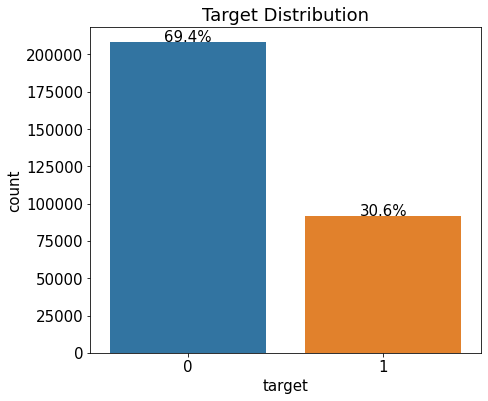

In [31]:
mpl.rc('font', size=15)
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

### 2.2 Binary feature distribution

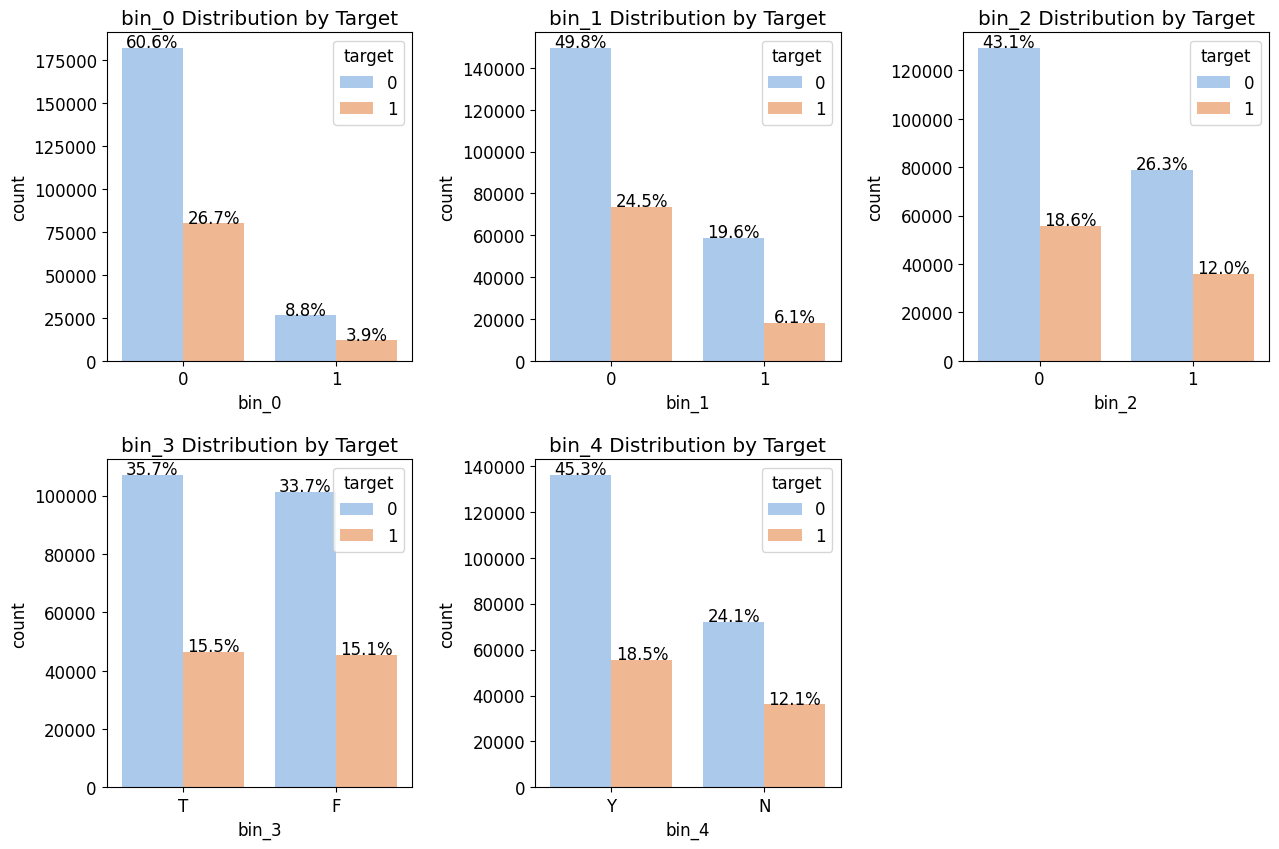

In [41]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(2, 3)
plt.figure(figsize=(15, 10), dpi=100)
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel',
                  ax=ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

### 2.3 Nominal feature distribution

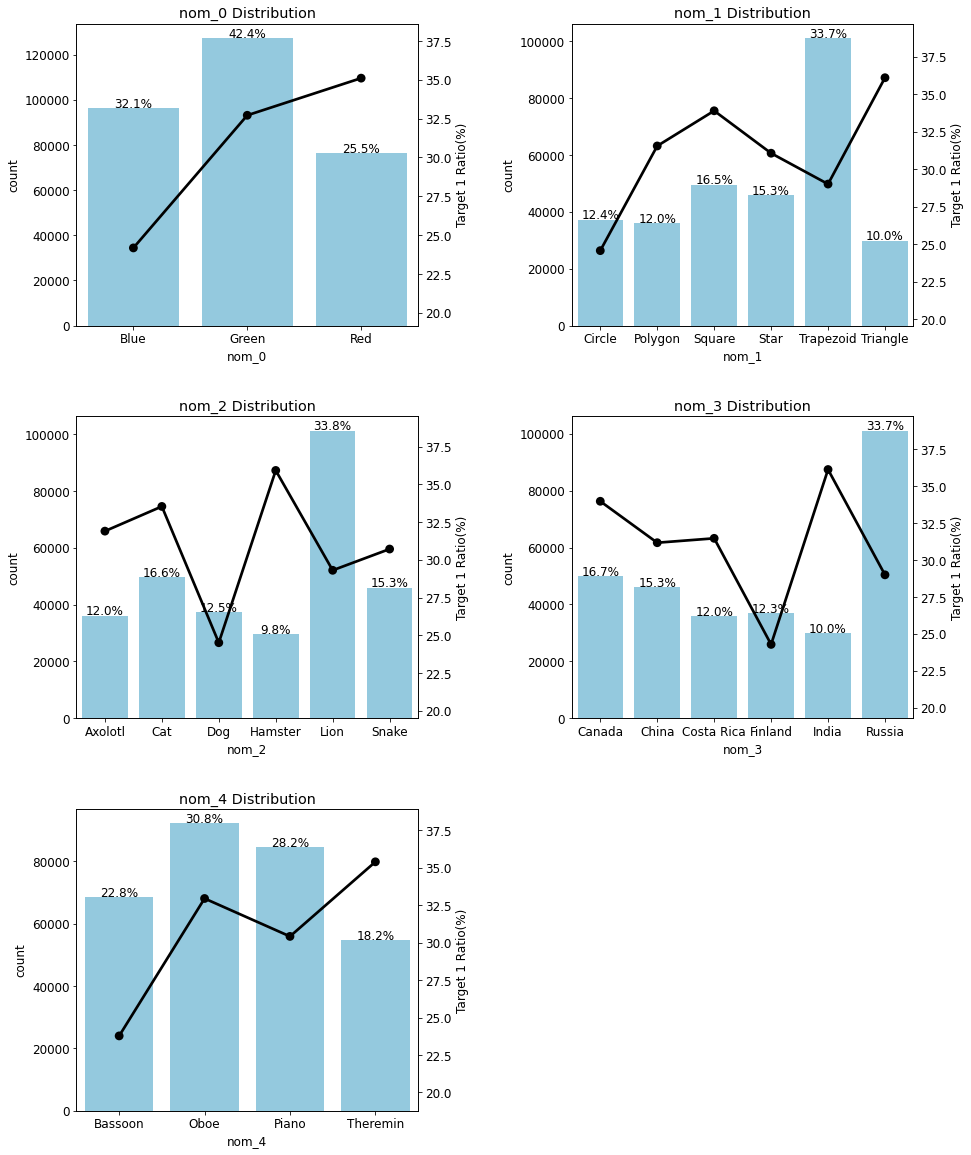

In [51]:
# STEP 1
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

# STEP 2
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values, color='black', legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

# STEP 3
def plot_cat_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=.45, hspace=.3)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)

        sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)
        write_percent(ax, len(df))

        plot_pointplot(ax, feature, crosstab)

        ax.set_title(f'{feature} Distribution')

nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

### 2.4 Ordinal feature distribution

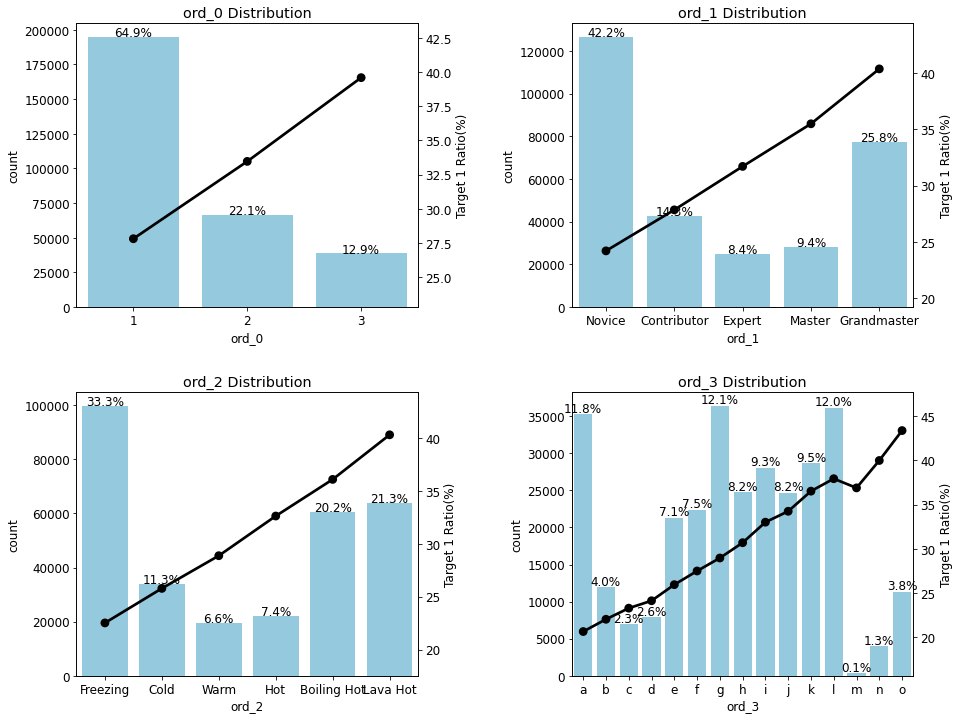

In [53]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15, 12))

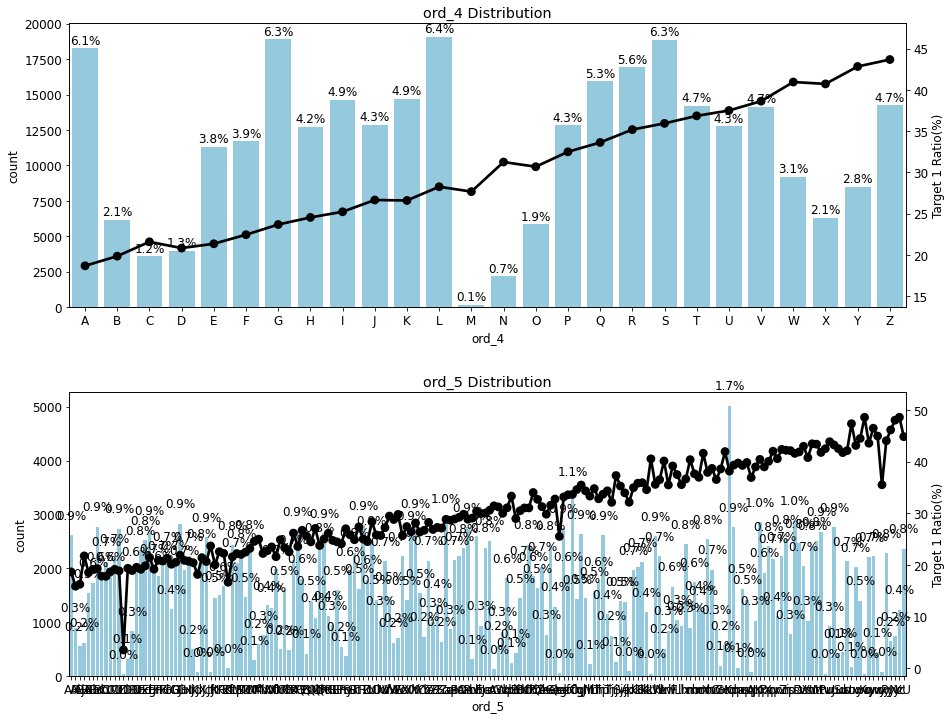

In [56]:
plot_cat_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

### 2.5 Date feature distribution

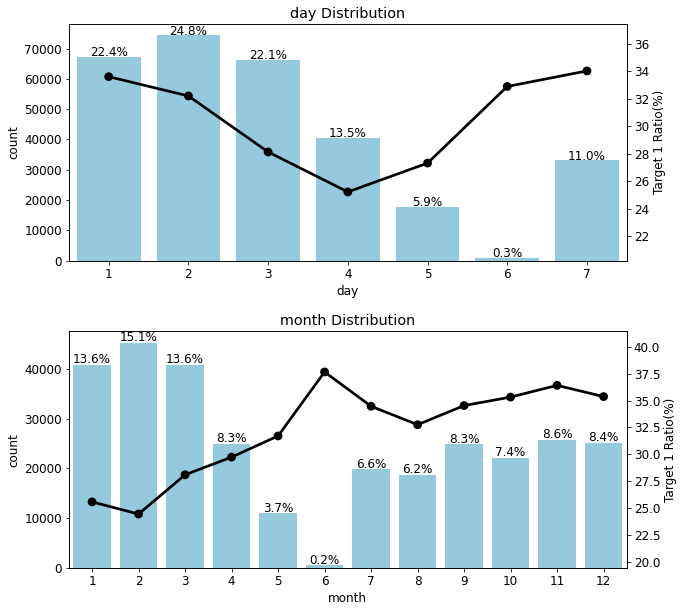

In [58]:
date_features = ['day', 'month']
plot_cat_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10, 10))

## 3. 분석 정리 및 모델링 전략
### 3.1 분석 정리
1. 결측값은 없다.
2. 모든 피처가 중요하여 제거할 피처를 찾지 못했다.
3. binary feature encoding: 값이 숫자가 아닌 이진 피쳐는 0과 1로 인코딩 하자.
4. nominal feature encoding: 전체 데이터가 크지 않으므로 모두 원-핫 해버리자.
5. ordinal feature encoding: 고윳값들의 순서가 맞게 인코딩하자.
6. date feature encoding: 값의 크고 작음으로 해석되지 못하도록 원-핫 해버리자.
### 3.2 모델링 전략
- 베이스라인 모델: 로지스틱 회귀 모델
    - 피처 엔지니어링: 모든 피처를 원-핫
- 성능개선: 추가 피처 엔지니어링고 하이퍼파라미터 최적화
    - 피처 엔지니어링: 피처 맞춤 인코딩과 피처 스케일링
    - 하이퍼파라미터 최적화: 그리드서치
    - 추가 팁: 검증 데이터를 훈련에 사용